In [1]:
import pandas as pd

#pandasでcsv読込み
df = pd.read_csv('move_data.csv')
print(df)

           x       y        z  label
0    -0.8811 -4.8399  -7.7228      2
1    -1.0490 -4.5050  -8.5301      2
2    -1.0130 -4.2704  -9.0995      2
3    -0.9489 -3.9566  -9.8840      2
4    -0.9607 -3.8533 -10.2756      2
...      ...     ...      ...    ...
2738 -0.8320  3.1991  -7.0286      1
2739 -2.2576  3.7605  -5.9412      1
2740 -2.2253  3.6642  -5.8802      1
2741 -1.4232  2.7892  -9.5632      1
2742 -4.2303  3.0652 -12.1147      1

[2743 rows x 4 columns]


In [2]:
#使用したラベルを抽出
label_list = df['label'].unique()

#各ラベル毎に移動平均と標準偏差のデータに変換
import numpy as np

#移動平均と標準偏差で計算対象とするデータ値
n = 50

#空のndarray作成
X = np.empty((0, 6)) #mean_x, mean_y, mean_z, std_x, std_y, std_z
y = np.empty((0))    #label

#label_listの数だけ処理
for label_value in label_list: 
    df_part = df[df['label'] == label_value] #ラベル列がlabelと一致する行のみ抜粋
    df_xyz = df_part.iloc[:, 0:3] #x,y,zのデータ列のみ抜粋

    #移動平均
    df_mean = df_xyz.rolling(n).mean() #n個ずつのデータで平均
    df_mean.columns = ['mean_x', 'mean_y', 'mean_z'] #列名を変更

    #標準偏差
    df_std = df_xyz.rolling(n).std() #n個ずつのデータで標準偏差
    df_std.columns = ['std_x', 'std_y', 'std_z'] #列名を変更

    #移動平均と標準偏差を横に結合
    df_xyz = df_mean.join(df_std)

    #NaN（欠損値）データが１つでも含まれる行は削除
    df_xyz = df_xyz.dropna()

    #データをndarrayに変換してXに追加
    np_xyz = df_xyz.values
    X = np.append(X, np_xyz, axis=0)

    #ラベルをndarrayに変換してyに追加
    np_label = np.ones(len(df_xyz)) * label_value
    y = np.append(y, np_label , axis=0)

#確認表示
print(X)
print(y)

[[-0.38686    -4.78935    -6.91895     0.8298669   0.97470593  1.95145584]
 [-0.36278    -4.863226   -6.9253      0.83269624  1.10930433  1.95463891]
 [-0.355002   -4.89623    -6.940586    0.82795846  1.12289401  1.97037041]
 ...
 [-0.12223     7.628188   -2.082138    4.31463763  5.5393372   5.92373991]
 [-0.213284    7.519904   -2.395138    4.29259693  5.58062838  5.89669628]
 [-0.342494    7.471284   -2.708138    4.31472106  5.60913624  5.99009669]]
[2. 2. 2. ... 1. 1. 1.]


In [42]:
# ライブラリのインポート
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import linear_model #線形回帰のライブラリを利用
from sklearn.model_selection import train_test_split

#訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [43]:
#ニューラルネットワークモデルの生成
#モデルの構成は
#入力(6次元)-1000次元-800次元-100次元-予測値
#Sequential()というのは入力から枝分かれせずに書けるモデルのクラス
#Dense()は全結合層
#activation は活性化関数，ここではReLUを用いている

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(800, activation = 'relu'))
model.add(Dense(100, activation =  'relu'))
model.add(Dense(3, activation="softmax"))

In [44]:
from tensorflow.keras.optimizers import Adam
model.compile("Adam", loss="sparse_categorical_crossentropy", metrics="sparse_categorical_accuracy")

In [45]:
#トレーニングデータで学習し，テストデータで評価

# batch_size: ミニバッチのデータ数
# epochs: 全部のデータについて処理する回数 1epoch = 1周
# verbose: 表示の形式，0だと何も表示されない
# validation_data: 評価用データ（ここではハイパーパラメータの調整をしないので
#   テストデータをそのまま用いている）

history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, 
          validation_data=(X_test, y_test))


Epoch 1/10
15/15 [==============================] - 0s 15ms/step - loss: 0.2526 - sparse_categorical_accuracy: 0.9551 - val_loss: 0.0044 - val_sparse_categorical_accuracy: 1.0000
Epoch 2/10
15/15 [==============================] - 0s 9ms/step - loss: 0.0035 - sparse_categorical_accuracy: 0.9992 - val_loss: 5.2567e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/10
15/15 [==============================] - 0s 8ms/step - loss: 2.8890e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.8786e-05 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/10
15/15 [==============================] - 0s 9ms/step - loss: 1.9136e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.9779e-05 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/10
15/15 [==============================] - 0s 9ms/step - loss: 5.6511e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.9112e-05 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 0s 8ms/step - loss: 3.3262e-0

25/25 [==============================] - 0s 1ms/step - loss: 1.4511e-05 - sparse_categorical_accuracy: 1.0000
2乗誤差の平均 [1.4511264453176409e-05, 1.0]


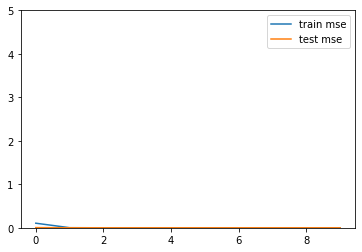

In [46]:
#pyplotを用いて結果を表示する
# model.evaluate() は予め決められた評価指標に従って評価を行う．
print('2乗誤差の平均',model.evaluate(X_test, y_test))

#学習の履歴は model.fit()の出力に historyとして含まれているので，それを取り出す．
train_acc = history.history['loss']
test_acc = history.history['val_loss']

x = np.arange(len(train_acc))
plt.plot(x, train_acc, label = 'train mse')
plt.plot(x, test_acc, label = 'test mse')
plt.ylim(0, 5)#y軸の範囲の指定
plt.legend() #グラフの線の説明を表示

[[ 5.02570000e-01 -8.85444400e+00 -6.93374000e-01  9.96046185e-01
   1.50915421e+00  4.56891246e+00]
 [ 4.71544000e-01 -8.94021600e+00 -4.09264000e-01  1.00665374e+00
   1.42452010e+00  4.61015240e+00]
 [ 4.52558000e-01 -8.99190400e+00 -1.72622000e-01  1.01500435e+00
   1.38041209e+00  4.66941935e+00]
 ...
 [ 4.38800000e-03 -9.63940400e+00 -1.74739600e+00  2.12194616e-01
   1.44627062e-01  3.50288493e-01]
 [ 1.26520000e-02 -9.64542200e+00 -1.77108800e+00  2.16338010e-01
   1.44386412e-01  3.59636751e-01]
 [ 1.77400000e-02 -9.64673000e+00 -1.78865600e+00  2.18743800e-01
   1.44148870e-01  3.81893651e-01]]


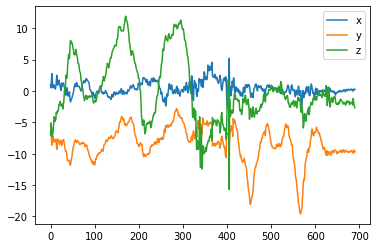

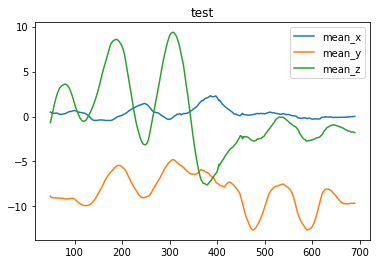

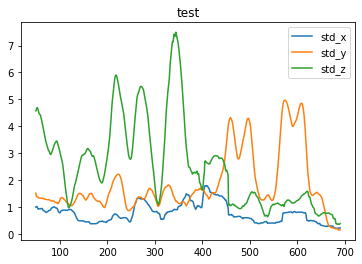

In [47]:
# テストデータを使用
#pandasでcsv読込み
df = pd.read_csv('move_test.csv')

#プロット
df.plot(y=df.columns[0:3])

#移動平均と標準偏差のデータに変換
import numpy as np

#移動平均と標準偏差で計算対象とするデータ値
n = 50

#x,y,zのデータ列のみ抜粋
df_xyz = df.iloc[:, 0:3]

#移動平均
df_mean = df_xyz.rolling(n).mean() #n個ずつのデータで平均
df_mean.columns = ['mean_x', 'mean_y', 'mean_z'] #列名を変更

#標準偏差
df_std = df_xyz.rolling(n).std() #n個ずつのデータで標準偏差
df_std.columns = ['std_x', 'std_y', 'std_z'] #列名を変更

#移動平均と標準偏差を横に結合
df_xyz = df_mean.join(df_std)

#NaN（欠損値）データが１つでも含まれる行は削除
df_xyz = df_xyz.dropna()

#プロット
df_xyz.plot(y=df_xyz.columns[0:3], title='test')
df_xyz.plot(y=df_xyz.columns[3:6], title='test')

#データをndarrayに変換してX_testとする
X_test = df_xyz.values

#確認表示
print(X_test)

In [48]:
#推論
y_pred = model.predict_classes(X_test)
#結果表示
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

/opt/anaconda3/envs/index/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [37]:
# 学習モデル保存
model.save('model.h5')